# Analyze the HI4PI spectra from the inner galaxy to test rotation curve analysis
### tried to include gausspy decomposition and it works well for first quadrant but not fourth (but ran out of time to investigate)
#### 8/10/21 jpw

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os, glob
import math
import pickle
import gausspy.gp as gp
%matplotlib inline

In [2]:
# customize plots
import matplotlib as mpl
mpl.rcParams['xtick.labelsize'] = 14
mpl.rcParams['ytick.labelsize'] = 14
mpl.rcParams['axes.labelsize'] = 18
mpl.rcParams['legend.fontsize'] = 18
mpl.rcParams['xtick.major.size'] = 6
mpl.rcParams['xtick.minor.size'] = 4
mpl.rcParams['xtick.major.width'] = 2
mpl.rcParams['ytick.major.size'] = 6
mpl.rcParams['ytick.minor.size'] = 4
mpl.rcParams['ytick.major.width'] = 2
mpl.rcParams['axes.linewidth'] = 2

### functions

In [7]:
def gaussian(amp, fwhm, mean):
    return lambda x: amp * np.exp(-4. * np.log(2) * (x-mean)**2 / fwhm**2)

def unravel(list):
    return np.array([i for array in list for i in array])

### gausspy parameters

In [8]:
# set the same for all spectra here
g = gp.GaussianDecomposer()

# Setting AGD parameters
g.set('phase', 'two')
g.set('alpha1' , 1.25)
g.set('alpha2' , 2.5)
g.set('SNR_thresh', 3)
g.set('SNR2_thresh', 3)

### code

In [19]:
path = '/Users/jpw/G/Analysis/HI4PI/SPECTRA'
os.chdir(path)
f = glob.glob('spectrum*.txt')
nf = len(f)
lon = np.asarray([int(f[i][12:].split('.')[0]) for i in range(nf)])
isort = np.argsort(lon)

In [20]:
# Galactocentric distance and rotation velocity
Rsun = 8.2   # kpc
Vsun = 220   # km/s

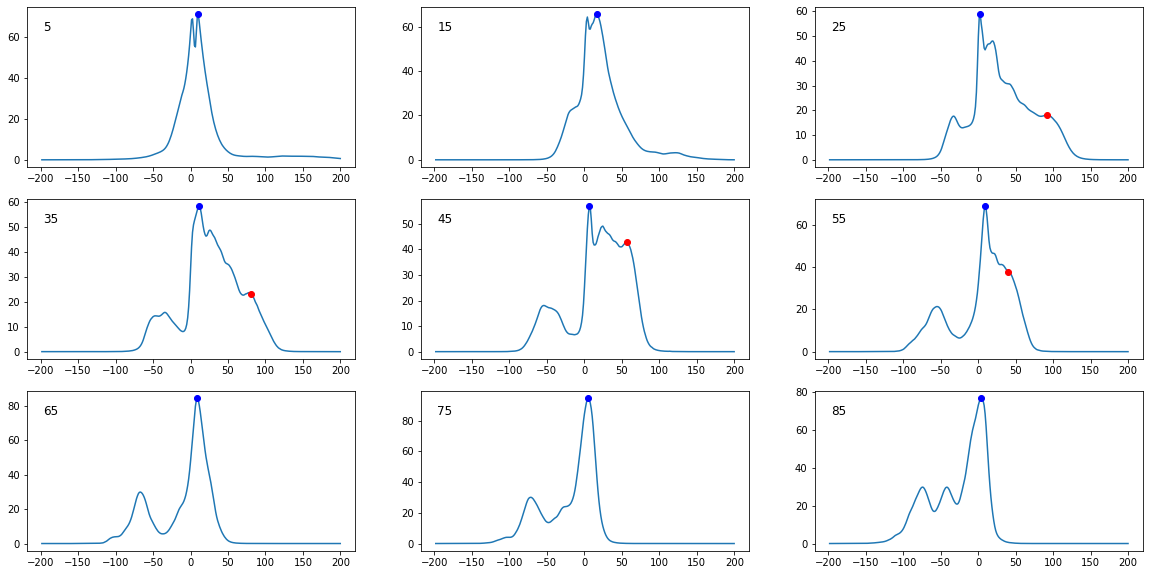

In [21]:
inner1 = np.where(lon<90)[0]
n = len(inner1)
linner1 = lon[inner1]
isort = np.argsort(linner1)

nx = 3
ny = math.ceil(n/nx)
sx = 20
sy = 0.5 * sx * ny / nx
fig = plt.figure(figsize=(sx,sy))

R1 = np.zeros(n)
vmax1 = np.zeros(n)
vrot1 = np.zeros(n)
for j,i in enumerate(isort):
    l1 = linner1[i]
    ax = fig.add_subplot(ny, nx, j+1)
    v, T = np.loadtxt(f[inner1[i]], unpack=True)
    #print(j, i, l1, f[inner1[i]])
    ax.plot(v, T)
    ax.text(0.05, 0.85, str(l1), fontsize=12, transform=ax.transAxes)
    
    # find the maximum
    kmax = np.argmax(T)
    vm = v[kmax]
    ax.plot(vm, T[kmax], 'bo')
    
    # now iterate for the shoulder spectra
    if (l1>20) & (l1<40):
        hi = v > 80
        vhi = v[hi]
        Thi = T[hi]
        k1 = np.argmax(Thi)
        ax.plot(vhi[k1], Thi[k1], 'ro')
        vm = vhi[k1]
        kmax = np.nonzero(hi)[0][0] + k1
    if (l1>40) & (l1<50):
        hi = v > 50
        vhi = v[hi]
        Thi = T[hi]
        k1 = np.argmax(Thi)
        ax.plot(vhi[k1], Thi[k1], 'ro')
        vm = vhi[k1]
        kmax = np.nonzero(hi)[0][0] + k1
    if (l1>50) & (l1<60):
        hi = v > 40
        vhi = v[hi]
        Thi = T[hi]
        k1 = np.argmax(Thi)
        ax.plot(vhi[k1], Thi[k1], 'ro')
        vm = vhi[k1]
        kmax = np.nonzero(hi)[0][0] + k1

        
    R1[j] = Rsun * np.sin(l1 * np.pi / 180)
    #vmax1[j] = vm
    
    # Shane & Bieger-Smith 1966 correction
    dv = v[1] - v[0]
    vmax1[j] = vm + dv*np.sum(T[kmax:])/T[kmax] - dv/2
    vrot1[j] = (vmax1[j]/np.sin(l1*np.pi/180) + Vsun)*R1[j]/Rsun
    
    #print(R1[j], vm, vmax1[j])
    

using 6 out of 8 cpus
   ---->   0


0.00it [00:00, ?it/s]
0it [00:00, ?it/s]


SUCCESS
100 finished.%
------------------------
lon = 5     R =  0.7
------------------------
  Amp     FWHM     Mean
  36.2     19.6    160.0
  30.6     41.1    157.3
------------------------
Vm =   6.5  Vmax =  34.2  Vrot =  53.4
using 6 out of 8 cpus
   ---->   0


0.00it [00:00, ?it/s]
0it [00:00, ?it/s]


SUCCESS
100 finished.%
------------------------
lon = 15     R =  2.1
------------------------
  Amp     FWHM     Mean
  54.5     24.8    162.7
  16.3     14.4    136.9
  20.2     34.2    181.5
   3.9    106.1    200.9
------------------------
Vm =  59.4  Vmax =  86.7  Vrot = 143.7
using 6 out of 8 cpus
   ---->   0


0.00it [00:00, ?it/s]
0it [00:00, ?it/s]


SUCCESS
100 finished.%
------------------------
lon = 25     R =  3.5
------------------------
  Amp     FWHM     Mean
  38.6     71.6    174.2
   3.2    475.3    534.2
   5.8      7.1    126.0
   0.0   -1205.6   -353.6
------------------------
Vm =  25.9  Vmax =  78.1  Vrot = 171.0
using 6 out of 8 cpus
   ---->   0


0.00it [00:00, ?it/s]
0it [00:00, ?it/s]


SUCCESS
100 finished.%
------------------------
lon = 35     R =  4.7
------------------------
  Amp     FWHM     Mean
  41.2     12.2    159.5
  46.9     24.8    174.9
  19.2     17.3    194.4
  16.2     32.2    124.9
  22.5    -31.6    215.1
------------------------
Vm =  78.7  Vmax =  99.3  Vrot = 225.4
using 6 out of 8 cpus
   ---->   0


0.00it [00:00, ?it/s]
0it [00:00, ?it/s]


SUCCESS
100 finished.%
------------------------
lon = 45     R =  5.8
------------------------
  Amp     FWHM     Mean
  35.3      7.1    158.5
  21.7     16.9    202.5
  18.6     31.1    116.8
  43.8     39.2    180.1
  11.4     12.7    169.1
------------------------
Vm =  61.9  Vmax =  74.1  Vrot = 229.7
using 6 out of 8 cpus
   ---->   0


0.00it [00:00, ?it/s]
0it [00:00, ?it/s]


SUCCESS
100 finished.%
------------------------
lon = 55     R =  6.7
------------------------
  Amp     FWHM     Mean
  27.8      7.3    160.3
  28.6     23.6    189.5
  20.1     31.2    109.9
  43.9     28.6    165.7
   2.1     10.4    139.2
------------------------
Vm =  45.2  Vmax =  60.0  Vrot = 240.2
using 6 out of 8 cpus
   ---->   0


0.00it [00:00, ?it/s]
0it [00:00, ?it/s]


SUCCESS
100 finished.%
------------------------
lon = 65     R =  7.4
------------------------
  Amp     FWHM     Mean
  27.3      8.7    160.9
  23.2     16.9    101.8
  55.5     26.9    163.2
   7.7     72.8    118.9
------------------------
Vm =  11.7  Vmax =  26.2  Vrot = 225.6
using 6 out of 8 cpus
   ---->   0


0.00it [00:00, ?it/s]
0it [00:00, ?it/s]


SUCCESS
100 finished.%
------------------------
lon = 75     R =  7.9
------------------------
  Amp     FWHM     Mean
  84.9     16.7    158.2
  22.1     17.9     98.6
  17.9     30.7    140.7
   9.5     66.3    115.2
------------------------
Vm =   5.2  Vmax =  17.0  Vrot = 229.5
using 6 out of 8 cpus
   ---->   0


0.00it [00:00, ?it/s]
0it [00:00, ?it/s]


SUCCESS
100 finished.%
------------------------
lon = 85     R =  8.2
------------------------
  Amp     FWHM     Mean
  31.9     10.4    159.6
  28.0     18.2    121.3
  20.7     19.2     96.6
  10.5     32.2     87.2
  61.0     23.5    151.0
------------------------
Vm =   6.5  Vmax =  15.5  Vrot = 234.7


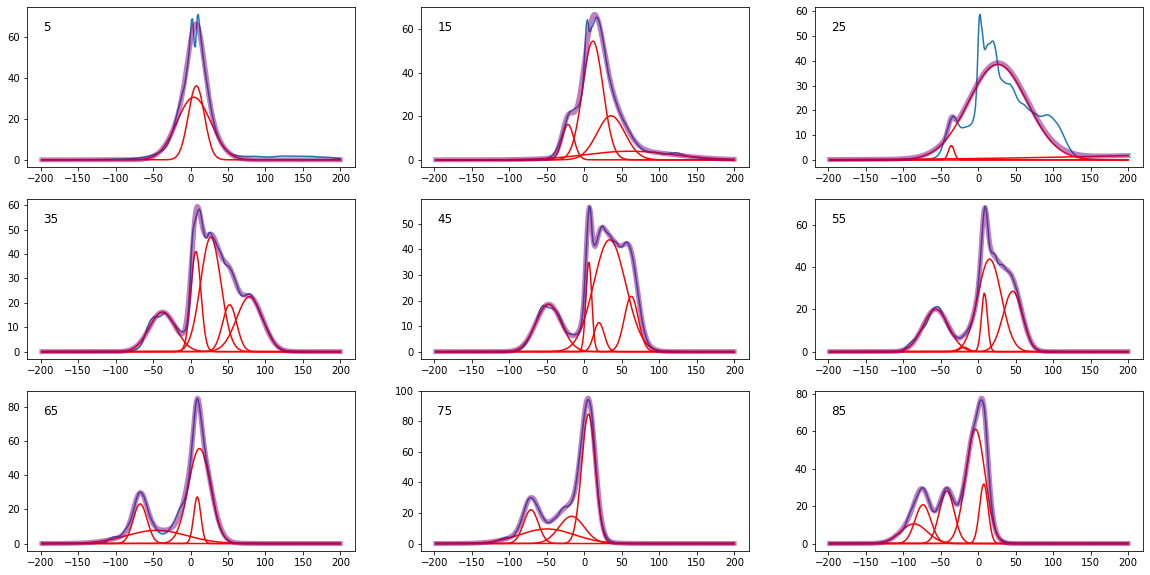

In [11]:
inner1 = np.where(lon<90)[0]
n = len(inner1)
linner1 = lon[inner1]
isort = np.argsort(linner1)

nx = 3
ny = math.ceil(n/nx)
sx = 20
sy = 0.5 * sx * ny / nx
fig = plt.figure(figsize=(sx,sy))

R1 = np.zeros(n)
vmax1 = np.zeros(n)
vrot1 = np.zeros(n)
for j,i in enumerate(isort):
    l1 = linner1[i]
    ax = fig.add_subplot(ny, nx, j+1)
    v, T = np.loadtxt(f[inner1[i]], unpack=True)
    #print(j, i, l1, f[inner1[i]])
    ax.plot(v, T)
    ax.text(0.05, 0.85, str(l1), fontsize=12, transform=ax.transAxes)
    
    # write it out in the format that gausspy wants to process
    pfile = 'tmp.pickle'
    nchan = T.size
    rms = 0.5
    data = {}
    chan = np.arange(nchan)
    errors = np.ones(nchan) * rms
    
    data['data_list'] = data.get('data_list', []) + [T]
    data['x_values'] = data.get('x_values', []) + [chan]
    data['errors'] = data.get('errors', []) + [errors]
    pickle.dump(data, open(pfile, 'wb'))
    
    # run GaussPy
    data_decomp = g.batch_decomposition(pfile)
    means_fit = unravel(data_decomp['means_fit'])
    amps_fit = unravel(data_decomp['amplitudes_fit'])
    fwhms_fit = unravel(data_decomp['fwhms_fit'])
    
    # plot the gaussian decomposition components
    model = np.zeros(len(chan))
    mu_max = -9999
    print('------------------------')
    print('lon = {0}     R = {1:4.1f}'.format(l1, Rsun * np.sin(l1 * np.pi / 180)))
    print('------------------------')
    print('  Amp     FWHM     Mean')
    for j in range(len(means_fit)):
        A = amps_fit[j]
        fwhm = fwhms_fit[j]
        mu = means_fit[j]
        print('{0:6.1f}   {1:6.1f}   {2:6.1f}'.format(A,fwhm,mu))
        component = gaussian(A, fwhm, mu)(chan)
        model += component
        ax.plot(v, component, color='red', lw=1.5)  
        if (A > 0) & (fwhm < 200) & (mu > mu_max):
            mu_max = mu
    ax.plot(v, model, color='purple', lw=5, alpha=0.5, zorder=99)
    print('------------------------')
        
    R1[i] = Rsun * np.sin(l1 * np.pi / 180)
    kmax = int(mu_max)
    vm = v[kmax]
    
    # Shane & Bieger-Smith 1966 correction
    dv = v[1] - v[0]
    vmax1[i] = vm + dv*np.sum(T[kmax:])/T[kmax] - dv/2
    vrot1[i] = (vmax1[i]/np.sin(l1*np.pi/180) + Vsun)*R1[i]/Rsun
    print('Vm ={0:6.1f}  Vmax ={1:6.1f}  Vrot ={2:6.1f}'.format(vm, vmax1[i], vrot1[i]))
    

[ 55  35  15  45   5  25 135 115 105  65 125  85  95  75 165 145 175 185
 195 155 225 235 215 205 265 295 275 245 255 285 315 325 305 335 355 345]


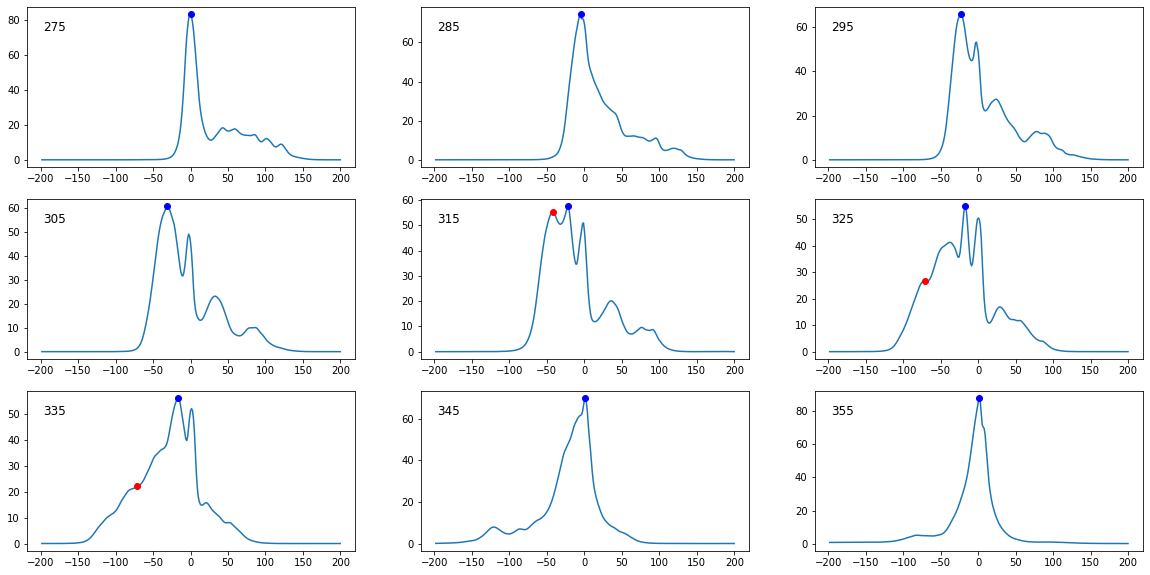

In [22]:
inner2 = np.where(lon>270)[0]
n = len(inner2)
linner2 = lon[inner2]
isort = np.argsort(linner2)

nx = 3
ny = math.ceil(n/nx)
sx = 20
sy = 0.5 * sx * ny / nx
fig = plt.figure(figsize=(sx,sy))

R2 = np.zeros(n)
vmax2 = np.zeros(n)
vrot2 = np.zeros(n)
for j,i in enumerate(isort):
    l2 = linner2[i]
    ax = fig.add_subplot(ny, nx, j+1)
    v, T = np.loadtxt(f[inner2[i]], unpack=True)
    #print(j, i, l2, f[inner2[i]])
    ax.plot(v, T)
    ax.text(0.05, 0.85, str(l2), fontsize=12, transform=ax.transAxes)
    
    # find the maximum
    kmax = np.argmax(T)
    vm = v[kmax]
    ax.plot(vm, T[kmax], 'bo')
    
    # now iterate for the shoulder spectra
    if (l2>310) & (l2<320):
        lo = v < -30
        vlo = v[lo]
        Tlo = T[lo]
        k1 = np.argmax(Tlo)
        ax.plot(vlo[k1], Tlo[k1], 'ro')
        vm = vlo[k1]
        kmax = k1
    if (l2>320) & (l2<340):
        lo = v < -70
        vlo = v[lo]
        Tlo = T[lo]
        k1 = np.argmax(Tlo)
        ax.plot(vlo[k1], Tlo[k1], 'ro')
        vm = vlo[k1]
        kmax = k1
        
    R2[j] = -Rsun * np.sin(l2 * np.pi / 180)
    #vmax2[j] = vm
    
    # Shane & Bieger-Smith 1966 correction
    dv = v[1] - v[0]
    vmax2[j] = vm - dv*np.sum(T[:kmax])/T[kmax] - dv/2
    vrot2[j] = (vmax2[j]/np.sin(l2*np.pi/180) + Vsun)*R2[j]/Rsun
    
    #print(R2[j], vm, vmax2[j])


using 6 out of 8 cpus
   ---->   0


0.00it [00:00, ?it/s]
0it [00:00, ?it/s]


SUCCESS
100 finished.%
------------------------
lon = 275     R =  8.2
------------------------
  Amp     FWHM     Mean
  33.2     10.8    152.9
  51.3     17.0    155.0
  16.7     41.6    191.2
  10.3     42.6    231.4
------------------------
Vm =  -2.5  Vmax =   0.0  Vrot =   0.0
using 6 out of 8 cpus
   ---->   0


0.00it [00:00, ?it/s]
0it [00:00, ?it/s]


SUCCESS
100 finished.%
------------------------
lon = 285     R =  7.9
------------------------
  Amp     FWHM     Mean
  71.7     22.4    149.5
  17.6     12.3    168.5
  11.6     69.5    207.2
  17.2     17.0    181.4
   0.5      0.0    264.5
   0.0   -341.3    300.6
------------------------
Vm =  -6.3  Vmax =   0.0  Vrot =   0.0
using 6 out of 8 cpus
   ---->   0


0.00it [00:00, ?it/s]
0it [00:00, ?it/s]


SUCCESS
100 finished.%
------------------------
lon = 295     R =  7.4
------------------------
  Amp     FWHM     Mean
  65.4     20.9    135.4
  26.4     33.2    171.5
  31.5      8.1    152.2
  12.0     37.0    218.1
   0.5      8.6    106.6
------------------------
Vm = -24.4  Vmax =   0.0  Vrot =   0.0
using 6 out of 8 cpus
   ---->   0


0.00it [00:00, ?it/s]
0it [00:00, ?it/s]


SUCCESS
100 finished.%
------------------------
lon = 305     R =  6.7
------------------------
  Amp     FWHM     Mean
  61.5     28.9    129.8
  35.9      8.4    152.9
  22.9    -28.4    178.9
   9.9     27.8    219.5
------------------------
Vm = -32.1  Vmax = -31.1  Vrot = 243.6
using 6 out of 8 cpus
   ---->   0


0.00it [00:00, ?it/s]
0it [00:00, ?it/s]


SUCCESS
100 finished.%
------------------------
lon = 315     R =  5.8
------------------------
  Amp     FWHM     Mean
  58.4     39.6    127.8
  30.8      7.8    153.0
  19.4     25.9    181.6
   9.5     27.0    217.8
   0.0    -55.3    -16.4
------------------------
Vm = -34.7  Vmax = -97.5  Vrot = 277.7
using 6 out of 8 cpus
   ---->   0


0.00it [00:00, ?it/s]
0it [00:00, ?it/s]


SUCCESS
100 finished.%
------------------------
lon = 325     R =  4.7
------------------------
  Amp     FWHM     Mean
  39.6     59.5    121.0
  33.4      8.0    154.0
  25.2      7.2    140.8
  12.6     42.7    189.0
  36.4     -0.1     52.6
------------------------
Vm =-131.3  Vmax =-199.4  Vrot = 325.6
using 6 out of 8 cpus
   ---->   0


0.00it [00:00, ?it/s]
0it [00:00, ?it/s]


SUCCESS
100 finished.%
------------------------
lon = 335     R =  3.5
------------------------
  Amp     FWHM     Mean
  44.7     54.2    140.7
  11.1     -8.5    140.5
  15.6     47.5     88.6
------------------------
Vm = -84.9  Vmax =   0.0  Vrot =   0.0
using 6 out of 8 cpus
   ---->   0


0.00it [00:00, ?it/s]
0it [00:00, ?it/s]


SUCCESS
100 finished.%
------------------------
lon = 345     R =  2.1
------------------------
  Amp     FWHM     Mean
  23.9      9.1    155.3
  46.2     33.8    144.8
  10.2    116.1    124.9
   0.0     61.1     23.2
------------------------
Vm = -38.5  Vmax =   0.0  Vrot =   0.0
using 6 out of 8 cpus
   ---->   0


0.00it [00:00, ?it/s]
0it [00:00, ?it/s]


SUCCESS
100 finished.%
------------------------
lon = 355     R =  0.7
------------------------
  Amp     FWHM     Mean
  47.9     14.6    155.1
  38.4     38.7    150.3
   4.8     38.7     92.0
------------------------
Vm = -81.1  Vmax =   0.0  Vrot =   0.0


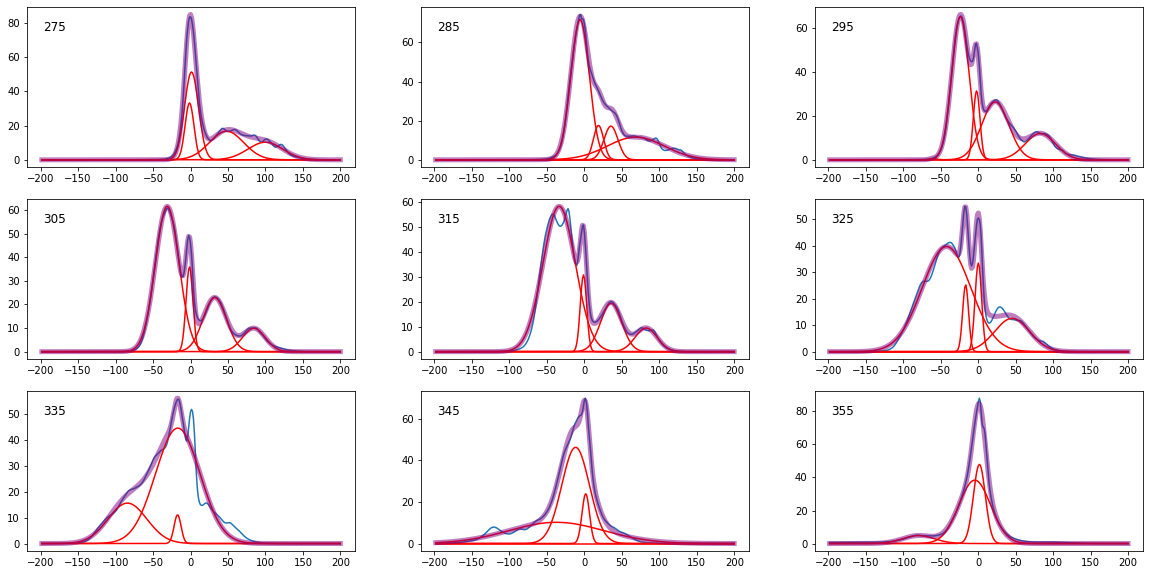

In [32]:
inner2 = np.where(lon>270)[0]
n = len(inner2)
linner2 = lon[inner2]
isort = np.argsort(linner2)

nx = 3
ny = math.ceil(n/nx)
sx = 20
sy = 0.5 * sx * ny / nx
fig = plt.figure(figsize=(sx,sy))

R2 = np.zeros(n)
vmax2 = np.zeros(n)
vrot2 = np.zeros(n)
for j,i in enumerate(isort):
    l2 = linner2[i]
    ax = fig.add_subplot(ny, nx, j+1)
    v, T = np.loadtxt(f[inner2[i]], unpack=True)
    ax.plot(v, T)
    ax.text(0.05, 0.85, str(l2), fontsize=12, transform=ax.transAxes)
    
    # write it out in the format that gausspy wants to process
    pfile = 'tmp.pickle'
    nchan = T.size
    rms = 1
    data = {}
    chan = np.arange(nchan)
    errors = np.ones(nchan) * rms
    
    data['data_list'] = data.get('data_list', []) + [T]
    data['x_values'] = data.get('x_values', []) + [chan]
    data['errors'] = data.get('errors', []) + [errors]
    pickle.dump(data, open(pfile, 'wb'))
    
    # run GaussPy
    data_decomp = g.batch_decomposition(pfile)
    means_fit = unravel(data_decomp['means_fit'])
    amps_fit = unravel(data_decomp['amplitudes_fit'])
    fwhms_fit = unravel(data_decomp['fwhms_fit'])
    
    # plot the gaussian decomposition components
    model = np.zeros(len(chan))
    mu_min = 9999
    print('------------------------')
    print('lon = {0}     R = {1:4.1f}'.format(l2, -Rsun * np.sin(l2 * np.pi / 180)))
    print('------------------------')
    print('  Amp     FWHM     Mean')
    for j in range(len(means_fit)):
        A = amps_fit[j]
        fwhm = fwhms_fit[j]
        mu = means_fit[j]
        print('{0:6.1f}   {1:6.1f}   {2:6.1f}'.format(A,fwhm,mu))
        component = gaussian(A, fwhm, mu)(chan)
        model += component
        ax.plot(v, component, color='red', lw=1.5)  
        if (A > 3) & (fwhm < 200) & (mu < mu_min):
            mu_min = mu
    ax.plot(v, model, color='purple', lw=5, alpha=0.5, zorder=99)
    print('------------------------')
        
    R2[j] = -Rsun * np.sin(l2 * np.pi / 180)
    kmin = int(mu_min)
    vm = v[kmin]
    
    # Shane & Bieger-Smith 1966 correction
    dv = v[1] - v[0]
    vmax2[j] = vm - dv*np.sum(T[:kmax])/T[kmax] - dv/2
    vrot2[j] = (vmax2[j]/np.sin(l2*np.pi/180) + Vsun)*R2[j]/Rsun
    print('Vm ={0:6.1f}  Vmax ={1:6.1f}  Vrot ={2:6.1f}'.format(vm, vmax2[i], vrot2[i]))


Text(0, 0.5, 'Vr (km/s)')

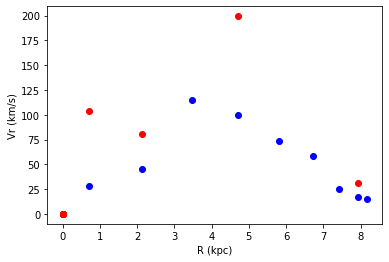

In [33]:
# radial velocity vs radius
plt.plot(R1, vmax1, 'bo')
plt.plot(R2, -vmax2, 'ro')
plt.xlabel('R (kpc)')
plt.ylabel('Vr (km/s)')

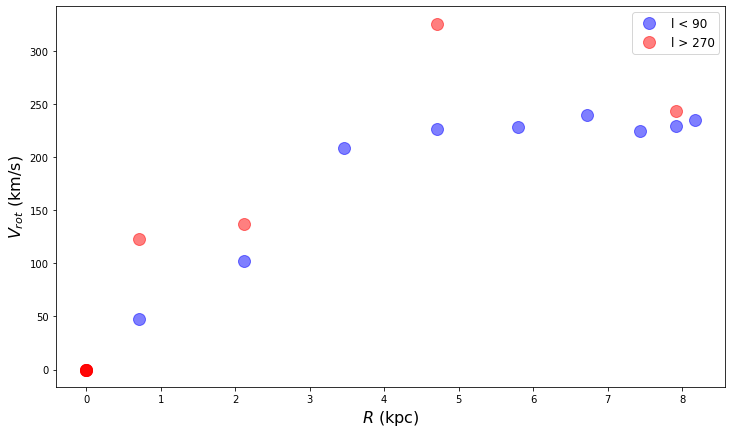

In [34]:
# rotation curve
fig = plt.figure(figsize=(12,7))
ax = fig.add_subplot(111)
ax.plot(R1, vrot1, 'bo', ms=12, alpha=0.5, label='l < 90')
ax.plot(R2, vrot2, 'ro', ms=12, alpha=0.5, label='l > 270')
ax.legend(fontsize=12)
ax.set_xlabel(r'$R$ (kpc)', fontsize=16)
ax.set_ylabel(r'$V_{rot}$ (km/s)', fontsize=16)
plt.savefig('rotation_curve.png')